# Predicting Coeffecient of Lift using the data generated with Xfoil

In [ ]:
# The following are the X paramters for predicting y value - "CL"

# 'Naca foil'
# 'Alpha'
# 'CD', 
# 'CDp', 
# 'CM', 
# 'Top_Xtr', 
# 'Bot_Xtr',
# 'Mach', 
# 'Reynolds number', 
# 'Max thickness', 
# 'Max thickness location',
# 'Max camber', 
# 'Max camber location', 
# 'TE gap', 
# 'LE radius', 
# 'TE angle'

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt   # Standard Libraries "

In [53]:
df = pd.read_csv("Xfoil_clubbed_data.csv") # df - dataframe reading csv file #

In [55]:
df.head() # df showing first 5 rows of the csv file #

,Naca foil,Alpha,CL,CD,CDp,CM,Top_Xtr,Bot_Xtr,Mach,Reynolds number,Max thickness,Max thickness location,Max camber,Max camber location,TE gap,LE radius,TE angle
0,12,-10.0,-1.2069,0.01135,0.00704,-0.0065,1.0000,0.0132,0.3,5000000,0.120035,0.3,0.0,0.013,0.00252,0.01582,15.97
1,12,-9.5,-1.1442,0.01066,0.00631,-0.0059,0.9989,0.0145,0.3,5000000,0.120035,0.3,0.0,0.013,0.00252,0.01582,15.97
2,12,-9.0,-1.0766,0.01000,0.00562,-0.0065,0.9969,0.0162,0.3,5000000,0.120035,0.3,0.0,0.013,0.00252,0.01582,15.97
3,12,-8.5,-1.0077,0.00939,0.00500,-0.0075,0.9950,0.0183,0.3,5000000,0.120035,0.3,0.0,0.013,0.00252,0.01582,15.97
4,12,-8.0,-0.9426,0.00889,0.00449,-0.0077,0.9899,0.0204,0.3,5000000,0.120035,0.3,0.0,0.013,0.00252,0.01582,15.97


In [4]:
df.columns

Index(['Naca foil', 'Alpha', 'CL', 'CD', 'CDp', 'CM', 'Top_Xtr', 'Bot_Xtr',
       'Mach', 'Reynolds number', 'Max thickness', 'Max thickness location',
       'Max camber', 'Max camber location', 'TE gap', 'LE radius', 'TE angle'],
      dtype='object')

In [56]:
df.shape # total rows of csv file  = 5372, columns = 17 #

(5372, 17)

In [57]:
df.isnull().sum() # check for any null values in df #

Naca foil                 0
Alpha                     0
CL                        0
CD                        0
CDp                       0
CM                        0
Top_Xtr                   0
Bot_Xtr                   0
Mach                      0
Reynolds number           0
Max thickness             0
Max thickness location    0
Max camber                0
Max camber location       0
TE gap                    0
LE radius                 0
TE angle                  0
dtype: int64

In [7]:
df.describe()

,Naca foil,Alpha,CL,CD,CDp,CM,Top_Xtr,Bot_Xtr,Mach,Reynolds number,Max thickness,Max thickness location,Max camber,Max camber location,TE gap,LE radius,TE angle
count,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5.372000e+03,5372.000000,5.372000e+03,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000
mean,5827.966865,-0.096891,0.319903,0.012832,0.008796,-0.062004,0.423933,0.394062,0.449516,6.364669e+06,0.142331,3.000000e-01,0.025029,0.345179,0.002988,0.053404,18.665065
std,7185.145100,5.860188,0.739775,0.017517,0.018343,0.055951,0.284656,0.388003,0.140886,1.108070e+06,0.050124,2.842436e-14,0.017243,0.120055,0.001052,0.115122,6.461845
min,12.000000,-10.000000,-1.207300,0.000650,-0.004170,-0.219300,0.002900,0.003100,0.300000,5.000000e+06,0.080023,3.000000e-01,0.000000,0.013000,0.001680,0.007010,10.640000
25%,2408.000000,-5.000000,-0.298100,0.006050,0.001500,-0.084200,0.186075,0.036000,0.300000,5.000000e+06,0.100029,3.000000e-01,0.018386,0.402000,0.002100,0.010970,13.320000
50%,2421.000000,0.000000,0.307800,0.007460,0.002920,-0.052250,0.410600,0.223650,0.500000,6.000000e+06,0.120035,3.000000e-01,0.020000,0.402000,0.002520,0.015840,15.970000
75%,6409.000000,5.000000,0.947300,0.010100,0.006000,-0.023200,0.621750,0.801025,0.600000,7.000000e+06,0.180052,3.000000e-01,0.020000,0.402000,0.003780,0.035660,23.670000
max,23015.000000,10.000000,2.100300,0.137140,0.136290,0.064200,1.000000,1.000000,0.800000,8.000000e+06,0.240069,3.000000e-01,0.060000,0.420000,0.005040,0.485500,31.230000


In [58]:
df1 = df.drop(["Top_Xtr","Bot_Xtr"],axis = 1)

# Dropping "Top_Xtr","Bot_Xtr" from dataframe, as both contribute very less effect on predicting CL #

In [11]:
df1.columns

Index(['Naca foil', 'Alpha', 'CL', 'CD', 'CDp', 'CM', 'Mach',
       'Reynolds number', 'Max thickness', 'Max thickness location',
       'Max camber', 'Max camber location', 'TE gap', 'LE radius', 'TE angle'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000006A09F88>,
      dtype=object)

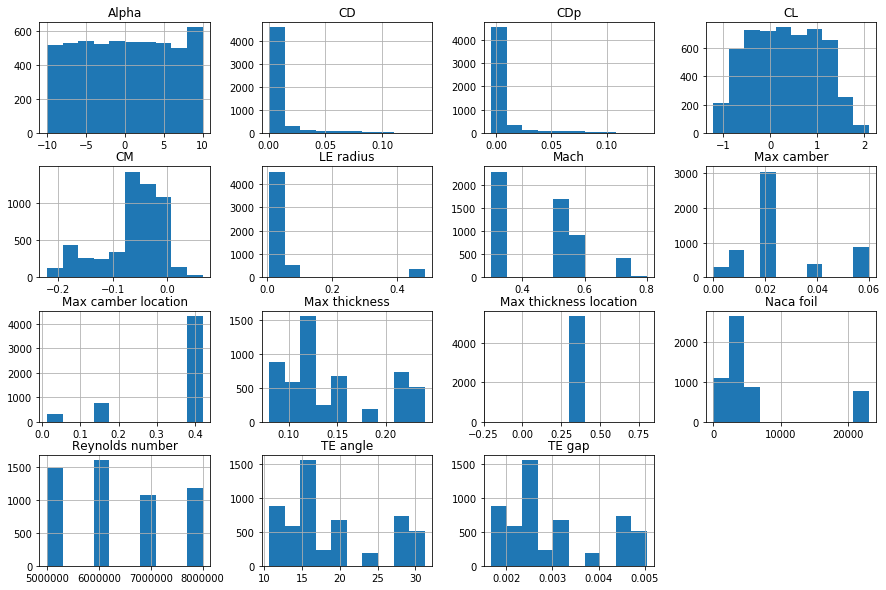

In [12]:
df1.hist(figsize = (15,10)) 
# Histogram for each X parameter #

In [13]:
corr = df1.corr()

In [14]:
corr
# relationship between each column - correlation #

,Naca foil,Alpha,CL,CD,CDp,CM,Mach,Reynolds number,Max thickness,Max thickness location,Max camber,Max camber location,TE gap,LE radius,TE angle
Naca foil,1.000000e+00,6.269419e-04,1.462890e-02,6.671088e-02,6.434003e-02,1.571881e-01,4.561126e-02,7.429361e-02,-1.048166e-01,5.035859e-16,8.720222e-02,-5.724002e-01,-1.048178e-01,-1.397537e-01,-9.959653e-02
Alpha,6.269419e-04,1.000000e+00,9.320261e-01,-2.420293e-01,-2.371529e-01,2.359217e-01,-2.892764e-02,-4.980133e-03,1.289712e-02,-5.011135e-17,-7.602045e-03,1.512204e-03,1.289727e-02,1.454814e-02,1.319608e-02
CL,1.462890e-02,9.320261e-01,1.000000e+00,-1.092487e-01,-1.054705e-01,-6.558902e-02,8.034824e-02,-1.081446e-02,-1.642198e-02,3.447706e-17,3.182380e-01,1.264544e-01,-1.642242e-02,-2.181671e-02,-2.575961e-02
CD,6.671088e-02,-2.420293e-01,-1.092487e-01,1.000000e+00,9.993533e-01,-1.626052e-02,2.901662e-01,-2.725173e-02,-1.346098e-01,1.190798e-15,1.720290e-01,2.469763e-02,-1.346104e-01,-9.784771e-02,-1.401062e-01
CDp,6.434003e-02,-2.371529e-01,-1.054705e-01,9.993533e-01,1.000000e+00,-1.336047e-02,2.964759e-01,-2.322068e-02,-1.454191e-01,-2.261983e-16,1.678339e-01,2.355939e-02,-1.454196e-01,-1.011737e-01,-1.508364e-01
CM,1.571881e-01,2.359217e-01,-6.558902e-02,-1.626052e-02,-1.336047e-02,1.000000e+00,-1.738885e-01,3.943033e-02,3.467718e-03,3.534753e-15,-8.539683e-01,-4.608753e-01,3.468921e-03,5.349329e-02,3.005831e-02
Mach,4.561126e-02,-2.892764e-02,8.034824e-02,2.901662e-01,2.964759e-01,-1.738885e-01,1.000000e+00,-4.699218e-02,1.484245e-01,4.492028e-14,1.662650e-01,3.930475e-03,1.484233e-01,6.601664e-02,1.427254e-01
Reynolds number,7.429361e-02,-4.980133e-03,-1.081446e-02,-2.725173e-02,-2.322068e-02,3.943033e-02,-4.699218e-02,1.000000e+00,-5.853092e-02,2.038365e-15,-6.306489e-03,2.379556e-03,-5.853072e-02,-3.936745e-02,-5.797501e-02
Max thickness,-1.048166e-01,1.289712e-02,-1.642198e-02,-1.346098e-01,-1.454191e-01,3.467718e-03,1.484245e-01,-5.853092e-02,1.000000e+00,2.448988e-14,-1.476345e-02,1.470414e-01,1.000000e+00,4.863573e-01,9.994891e-01
Max thickness location,5.035859e-16,-5.011135e-17,3.447706e-17,1.190798e-15,-2.261983e-16,3.534753e-15,4.492028e-14,2.038365e-15,2.448988e-14,1.000000e+00,-1.340743e-14,-9.220274e-14,-1.826994e-13,1.905657e-15,-9.958710e-15


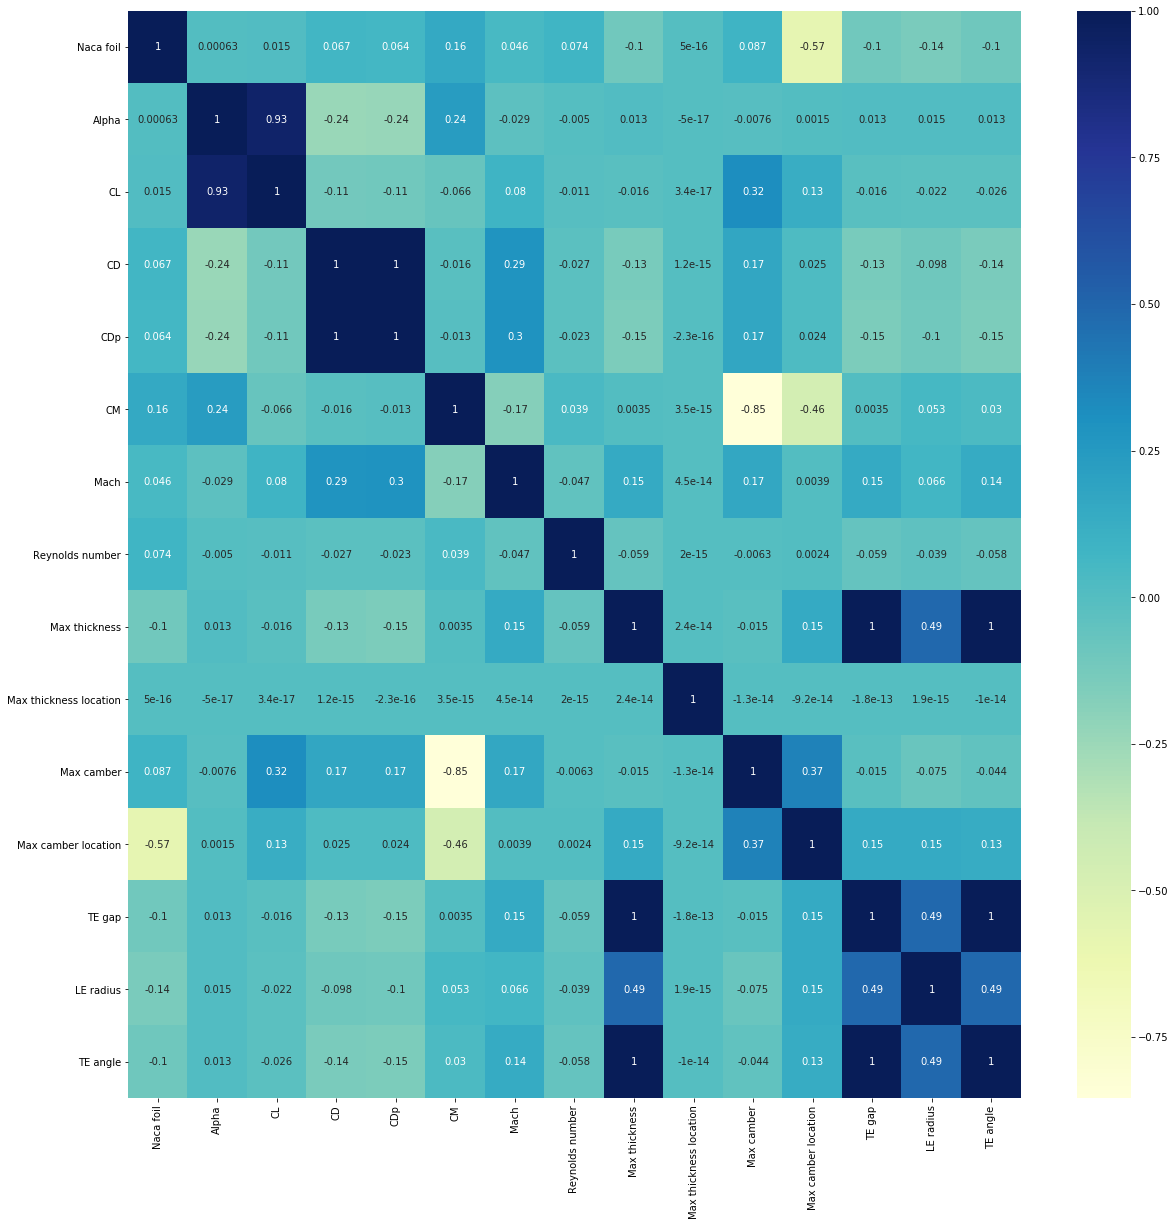

In [59]:
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr(), annot = True, cmap = "YlGnBu")

# relationship between each column - correlation #
# value of 1 means highly correlated hence can dropped from dataframe #
# here "CD", "CDp" is highlt correlated, hence either one of the column can be dropped #
# Similarly "TE gap" and "TE angle"

<Figure size 1440x1440 with 0 Axes>

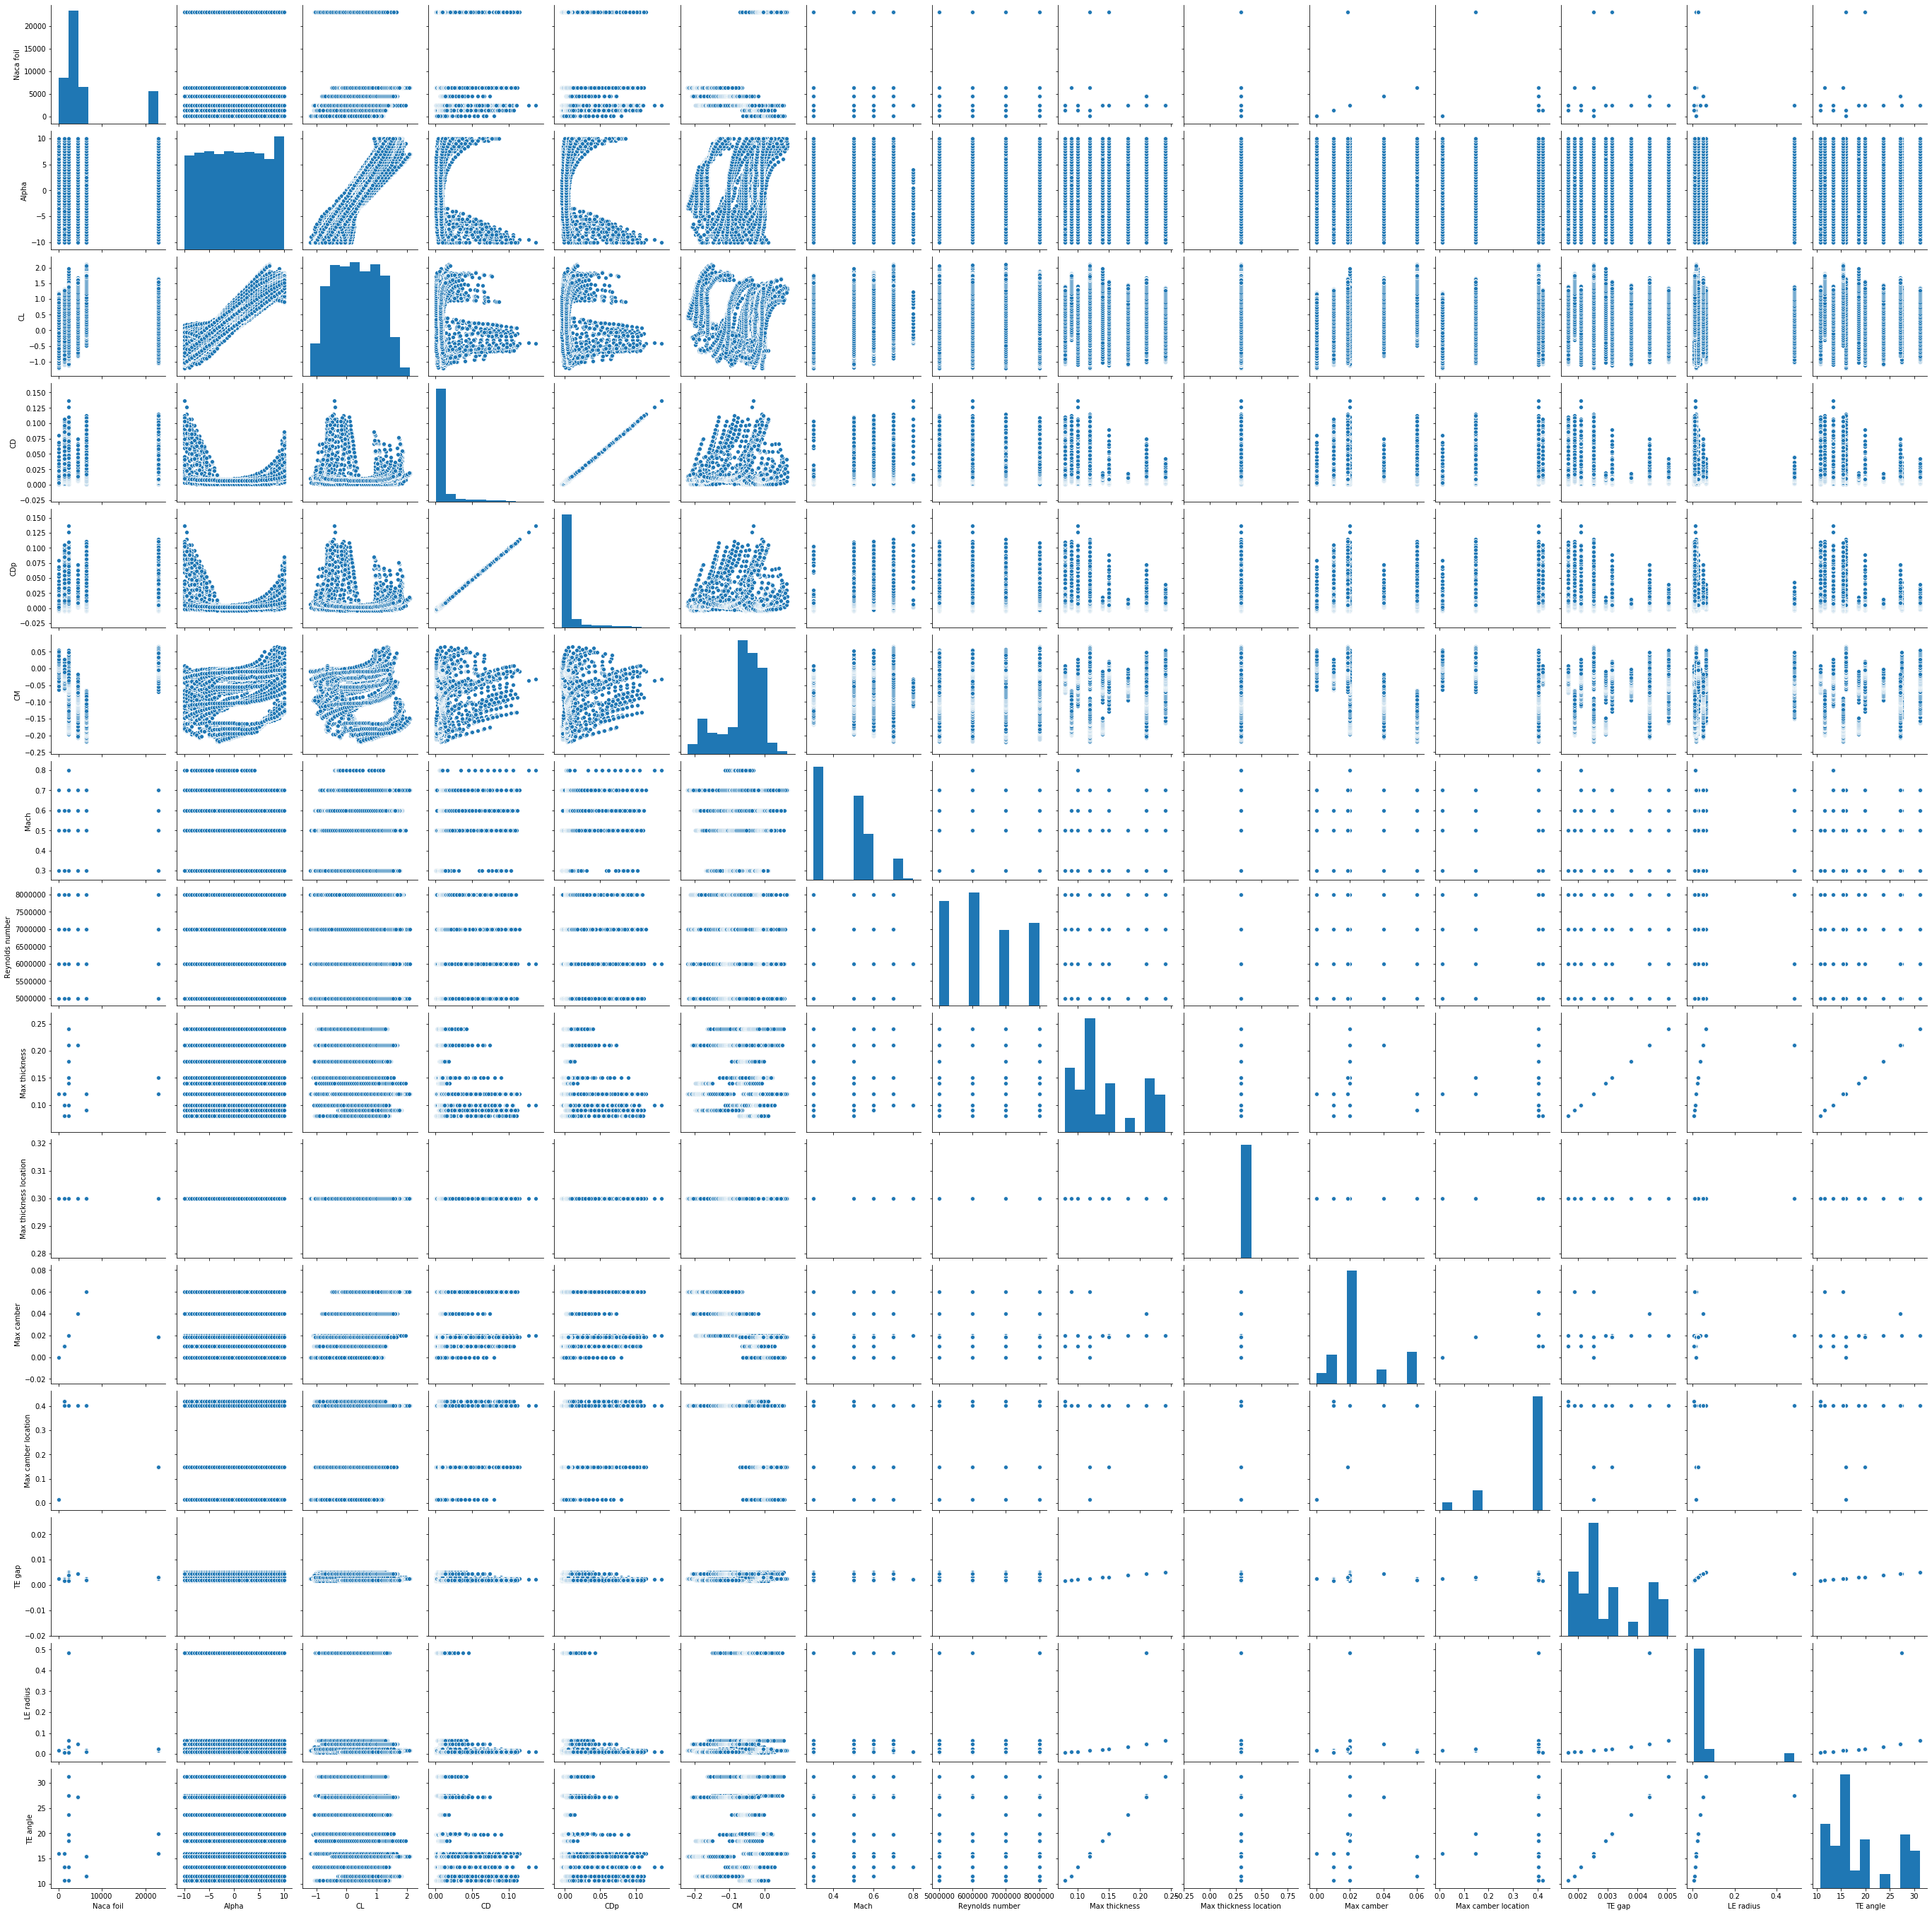

In [19]:
plt.figure(figsize = (20,20))
sns.pairplot(df1)

# pairplot shows the relationship between each columns #

In [20]:
X = df1.drop(["CL"], axis = 1)

In [21]:
X.head(2) 

,Naca foil,Alpha,CD,CDp,CM,Mach,Reynolds number,Max thickness,Max thickness location,Max camber,Max camber location,TE gap,LE radius,TE angle
0,12,-10.0,0.01135,0.00704,-0.0065,0.3,5000000,0.120035,0.3,0.0,0.013,0.00252,0.01582,15.97
1,12,-9.5,0.01066,0.00631,-0.0059,0.3,5000000,0.120035,0.3,0.0,0.013,0.00252,0.01582,15.97


In [22]:
y = df1["CL"]

In [23]:
y.head(2)

0   -1.2069
1   -1.1442
Name: CL, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [27]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

# Using Random forest Regressor algorithm, for predicting y - CL #

In [32]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train) # fitting X_train n y_train to random forest regressor algo #
ypred = rfr.predict(X_test) # predicting CL #

In [30]:
rfr.score(X_train,y_train)

0.9997590320497768

In [33]:
print(metrics.mean_absolute_error(y_test,ypred))
print(metrics.mean_squared_error(y_test,ypred))
print(np.sqrt(metrics.mean_squared_error(y_test,ypred)))
print(metrics.r2_score(y_test,ypred)) # the predicted CL using the algo and Actual Cl are 99.81 close enough% 

0.01604320236906415
0.0009887396360655702
0.03144423056882725
0.9981722524939497


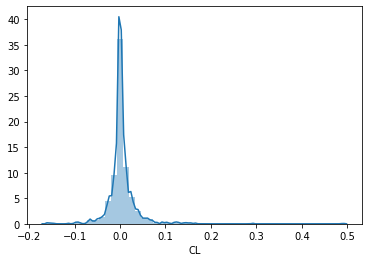

In [50]:
sns.distplot(y_test - ypred)

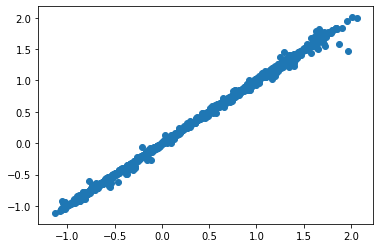

In [51]:
plt.scatter(y_test,ypred) # the below figure shows how close the predicted y value and actual y value are close#

In [39]:
predict0 = rfr.predict([X.iloc[0,:]]) 

In [40]:
predict0 # predicting 0th row (1st row) with X-values #

array([-1.19940967])

In [41]:
# Actual value of zeroth row #
print(y[0])

-1.2069


In [44]:
predict1 = rfr.predict([X.iloc[1,:]])

In [45]:
predict1 # predicting 2nd row with X-values #

array([-1.14769167])

In [46]:
# Actual value of 2nd row#
print(y[1])

-1.1442


In [47]:
predict21 = rfr.predict([X.iloc[21,:]])

In [48]:
predict21 # predicting 22nd row with X-values #

array([0.06222075])

In [49]:
# Actual value of 22nd row#
print(y[21])

0.0596
